In [2]:
import pandas as pd

In [3]:
melbourne_data  = pd.read_csv('melb_data.csv', index_col= 0)

In [4]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
# drop all rows containing all NA
melbourne_data = melbourne_data.dropna(axis=0, how='any')

In [6]:
melbourne_predictors = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']

In [7]:
X = melbourne_data[melbourne_predictors]

In [8]:
y = melbourne_data.Price

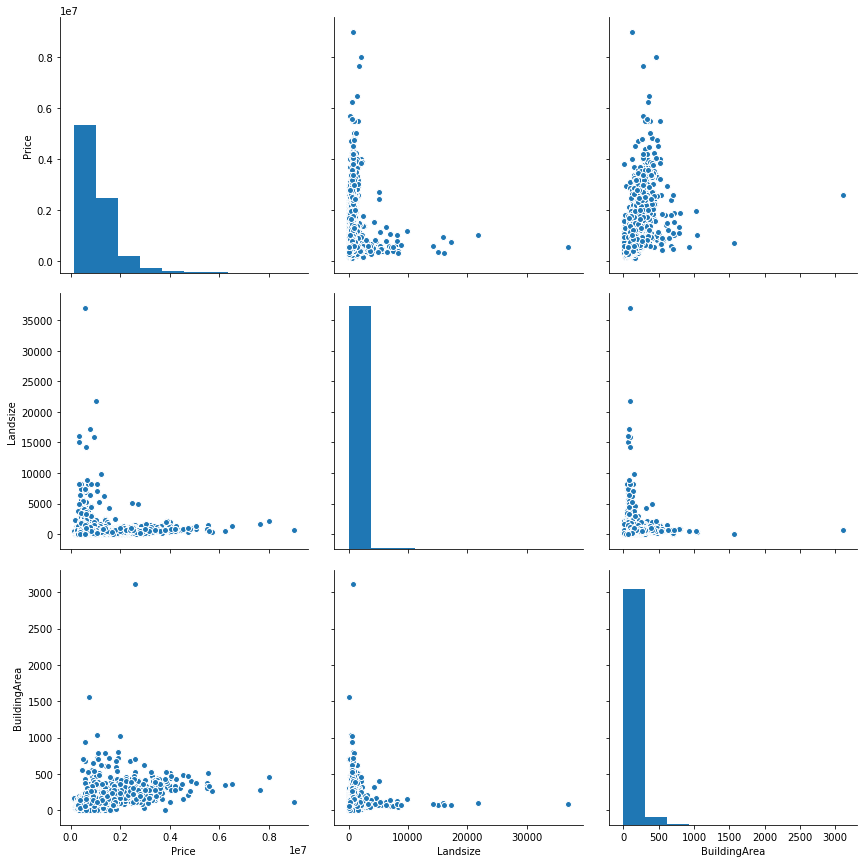

In [9]:
%matplotlib inline    

import seaborn as sns
num_cols = ["Price","Landsize","BuildingArea"] 
sns.pairplot(melbourne_data[num_cols], size=4)


In [10]:
from sklearn.tree import DecisionTreeRegressor

# Define model
melbourne_model = DecisionTreeRegressor()

# Fit model
melbourne_model.fit(X, y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [13]:

print("Making predictions for the following 5 houses:")
print(X.head(1))
print("The predictions are")
print(melbourne_model.predict(X.head(1)))


print(melbourne_data.head(1))


Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude
2      2       1.0     156.0          79.0     1900.0   -37.8079    144.9934
The predictions are
[1035000.]
       Suburb          Address  Rooms Type    Price Method SellerG       Date  \
2  Abbotsford  25 Bloomburg St      2    h  1035000      S  Biggin  4/02/2016   

   Distance  Postcode      ...       Bathroom  Car  Landsize  BuildingArea  \
2       2.5    3067.0      ...            1.0  0.0     156.0          79.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
2     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   

  Propertycount  
2        4019.0  

[1 rows x 21 columns]


In [19]:
print(melbourne_data.head(1))
print(melbourne_model.predict(X.head(1)))

       Suburb          Address  Rooms Type    Price Method SellerG       Date  \
2  Abbotsford  25 Bloomburg St      2    h  1035000      S  Biggin  4/02/2016   

   Distance  Postcode      ...       Bathroom  Car  Landsize  BuildingArea  \
2       2.5    3067.0      ...            1.0  0.0     156.0          79.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
2     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   

  Propertycount  
2        4019.0  

[1 rows x 21 columns]
[1035000.]


array([1035000.])

In [12]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)


434.71594577146544

In [21]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both predictors and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))


259891.12653324727


In [17]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both predictors and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [20]:
train_y

17108    1060000
9540      390000
13875     502000
10916    1055000
1340     1900000
2814     1587500
9833      607000
17438     920000
2276      880000
14249    1275000
12611    1250000
7239      450000
14009    1005000
17579     735000
8677      784000
17641     373500
14058    1100000
8841      905000
11839     593000
694      1365000
4448      711000
12078    1250000
15792     865000
9634     1950000
5611      785000
2047     1845000
16891     500000
9960      480000
2430      970000
6712      483000
          ...   
2331      521500
6009     3650000
261       678000
7497      815500
5601     2600000
6154      275000
15285     644000
16179    1020000
6600      470000
19242    1440000
8781      439000
1658      775000
5046     2600000
8786     1040000
6813      725000
6500     1650000
7799      725000
2225     1261000
10555     895000
18960     740000
18824     510000
13554     770000
3240     1450000
18675     503750
15315     410000
15587    1875000
9873      605000
4922      7090

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)


In [48]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))


Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 50  		 Mean Absolute Error:  257829
Max leaf nodes: 500  		 Mean Absolute Error:  243176
Max leaf nodes: 5000  		 Mean Absolute Error:  254915


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor()
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))


203925.399822


In [50]:
melbourne_data

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,11,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,14,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
11,18,Abbotsford,10 Valiant St,2,h,1097000,S,Biggin,8/10/2016,2.5,...,1.0,2.0,220.0,75.00,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4019.0
16,24,Abbotsford,40 Nicholson St,3,h,1350000,VB,Nelson,12/11/2016,2.5,...,2.0,2.0,214.0,190.00,2005.0,Yarra,-37.80850,144.99640,Northern Metropolitan,4019.0
17,25,Abbotsford,123/56 Nicholson St,2,u,750000,S,Biggin,12/11/2016,2.5,...,2.0,1.0,0.0,94.00,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4019.0
22,30,Abbotsford,16 William St,2,h,1310000,S,Jellis,15/10/2016,2.5,...,1.0,2.0,238.0,97.00,1890.0,Yarra,-37.80900,144.99760,Northern Metropolitan,4019.0
23,32,Abbotsford,42 Henry St,3,h,1200000,S,Jellis,16/07/2016,2.5,...,2.0,1.0,113.0,110.00,1880.0,Yarra,-37.80560,144.99300,Northern Metropolitan,4019.0


In [53]:
melbourne_data['Suburb'].value_counts().head(10).plot.bar()


In [54]:
plt.show()

NameError: name 'plt' is not defined